# HAMOUDY-BDER : 211328737
# MARIAM-TAHA : 322592916

# imports

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

In [61]:
# Load the DataFrame
data_of_spam_ham = pd.read_csv("spam_ham_dataset.csv")#load the data from the data.csv file into a dataframe using pandas
print(f'the dataset:{data_of_spam_ham.shape[0]} with :{data_of_spam_ham.shape[1]}' )

the dataset:5171 with :4


tokenization:

In [62]:
data_of_spam_ham['t_text'] = data_of_spam_ham['text'].apply(lambda x: x.split())#apply a function that performs tokenization to each element in the column
data_of_spam_ham['t_text']

0       [Subject:, enron, methanol, ;, meter, #, :, 98...
1       [Subject:, hpl, nom, for, january, 9, ,, 2001,...
2       [Subject:, neon, retreat, ho, ho, ho, ,, we, '...
3       [Subject:, photoshop, ,, windows, ,, office, ....
4       [Subject:, re, :, indian, springs, this, deal,...
                              ...                        
5166    [Subject:, put, the, 10, on, the, ft, the, tra...
5167    [Subject:, 3, /, 4, /, 2000, and, following, n...
5168    [Subject:, calpine, daily, gas, nomination, >,...
5169    [Subject:, industrial, worksheets, for, august...
5170    [Subject:, important, online, banking, alert, ...
Name: t_text, Length: 5171, dtype: object

# 3.EDA :

In [63]:
data_of_spam_ham.fillna(-99,inplace=True)

In [64]:
data_of_spam_ham.label.value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer(lowercase=True,stop_words='english')
bow=vectorizer.fit_transform(data_of_spam_ham['text'])
bow_sum=bow.sum(axis=0)
Frequency=[(word,bow_sum[0,idx])for word,idx in vectorizer.vocabulary_.items()]
DfFrequency=pd.DataFrame(Frequency, columns=['word','frequency'])
DfFrequency=DfFrequency.sort_values(by='frequency',ascending=False)
DfFrequency

,word,frequency
1181,ect,13900
0,subject,8060
1180,hou,7289
1,enron,6555
455,2000,4386
...,...,...
27329,145125,1
27317,5665,1
27316,973,1
27313,edificador,1


In [66]:
data_of_spam_ham.label_num.value_counts()

0    3672
1    1499
Name: label_num, dtype: int64

In [67]:
#Unnecessary
#Illustration in one of the columns through a diagram:

spam = data_of_spam_ham[data_of_spam_ham.label_num ==1].shape[0]
non_spam = data_of_spam_ham[data_of_spam_ham.label_num ==0].shape[0]

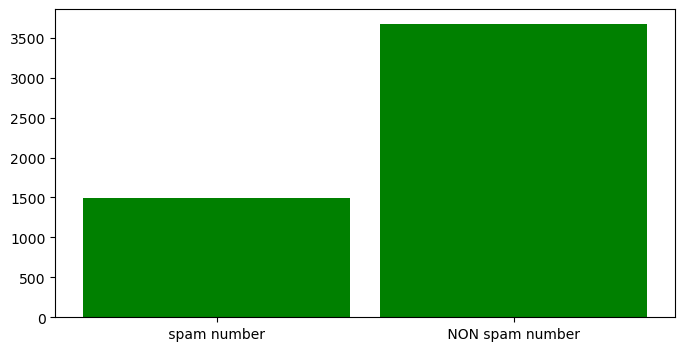

In [68]:
plt.figure(1,figsize=(8,4))
our_bar_plot_show = plt.bar([' spam number ',' NON spam number ' ],[spam,non_spam] , color="green" ,width = 0.9)

# 4.Retrieval of features : (from text to features)


In [69]:
# we decided to retrieval the features with TF/IDF

term frequency-inverse document frequency (TF-IDF) :

In [70]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(data_of_spam_ham,test_size=0.2,random_state =1)
print(f'the train shape:{train.shape[0]} the test shape :{test.shape[0]}' )
#remove the null categories
train_text = train[~pd.isnull(train['text'])]['text']
test_text =test[~pd.isnull(test['text'])]['text']
print(f'the train shape:{train.shape[0]} the test shape :{test.shape[0]}' )

the train shape:4136 the test shape :1035
the train shape:4136 the test shape :1035


In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer =TfidfVectorizer(sublinear_tf=True, stop_words="english")

In [72]:
tfdidfmatrix_train = vectorizer.fit_transform(train_text)
print(f'TRAIN : the dataset:{tfdidfmatrix_train.shape[0]} records and :{tfdidfmatrix_train.shape[1]} features' )

TRAIN : the dataset:4136 records and :44456 features


In [73]:
tfdidfmatrix_test = vectorizer.transform(test_text)
print(f'TEST :the dataset:{tfdidfmatrix_test.shape[0]} records and :{tfdidfmatrix_test.shape[1]} features')

TEST :the dataset:1035 records and :44456 features


In [74]:
features_name_table = vectorizer.get_feature_names_out()
features_name_table

array(['00', '000', '0000', ..., 'zzo', 'zzocb', 'zzsyt'], dtype=object)

# 5 & 6 .Classification model with Sikit-Learn && Accuracy assessment

In [75]:
# the label_num It is normalized to the spam and not spam column ,
#That is, instead of normalization it is already ready for as A :0 / 1
#0 : not spam / 1 : is spam.
output_train = train[~pd.isnull(train["text"])]["label_num"]
output_test = test[~pd.isnull(test["text"])]["label_num"]

In [76]:
#Classification :
from sklearn.linear_model import LogisticRegression
classefier = LogisticRegression(C=5,max_iter=1000)
classefier.fit(tfdidfmatrix_train , output_train)

LogisticRegression(C=5, max_iter=1000)

In [77]:
predictions = classefier.predict(tfdidfmatrix_test)

In [78]:
from sklearn import metrics
recall1 = metrics.recall_score(output_test,predictions)
recall1

0.9967105263157895

In [79]:
precision1 = metrics.precision_score(output_test,predictions)
precision1

0.9711538461538461

In [80]:
accuary1 = metrics.accuracy_score(output_test,predictions)
accuary1

0.9903381642512077

In [81]:
f1_1 = metrics.f1_score(output_test,predictions)
f1_1

0.9837662337662337

# 7. Different retrieval of features :

First retrieval:

In [82]:
vectorizer1 = TfidfVectorizer(stop_words="english" , ngram_range=(1,5))
tfdidfmatrix_train = vectorizer1.fit_transform(train_text)

In [83]:
tfdidfmatrix_test = vectorizer1.transform(test_text)

In [84]:
classefier = LogisticRegression(C=5,max_iter=1000)
classefier.fit(tfdidfmatrix_train , output_train)

LogisticRegression(C=5, max_iter=1000)

In [85]:
predictions =classefier.predict(tfdidfmatrix_test)

In [86]:
recall2 = metrics.recall_score(output_test,predictions)
recall2

0.9638157894736842

In [87]:
precision2 = metrics.precision_score(output_test,predictions)
precision2

0.9932203389830508

In [88]:
accuary2 = metrics.accuracy_score(output_test,predictions)
accuary2

0.9874396135265701

In [89]:
f1_2 = metrics.f1_score(output_test,predictions)
f1_2

0.9782971619365609

Second retrieval :

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
vectorizer2 = TfidfVectorizer(ngram_range=(2, 2),max_features = 100, stop_words="english")
tfdidfmatrix_train = vectorizer2.fit_transform(train_text)
tfdidfmatrix_test = vectorizer2.transform(test_text)

In [92]:
classefier =  DecisionTreeClassifier()
classefier.fit(tfdidfmatrix_train , output_train)

DecisionTreeClassifier()

In [93]:
predictions = classefier.predict(tfdidfmatrix_test)

In [94]:
recall3 = metrics.recall_score(output_test, predictions)
recall3

0.9638157894736842

In [95]:
precision3 = metrics.precision_score(output_test, predictions)
precision3

0.5943204868154158

In [96]:
accuary3 = metrics.accuracy_score(output_test, predictions)
accuary3

0.7961352657004831

In [97]:
f1_3 = metrics.f1_score(output_test, predictions)
f1_3

0.7352572145545796

Third retrieval :

In [98]:
vectorizer3 = CountVectorizer(min_df=0.1,max_df=0.7, stop_words="english")
bow_train = vectorizer3.fit_transform(train_text)
bow_test = vectorizer3.transform(test_text)

In [99]:
classefier = LogisticRegression(C=5,max_iter=1000)
classefier.fit(bow_train , output_train)

LogisticRegression(C=5, max_iter=1000)

In [100]:
predictions = classefier.predict(bow_test)

In [101]:
recall4 = metrics.recall_score(output_test, predictions)
recall4

0.9243421052631579

In [102]:
precision4 = metrics.precision_score(output_test, predictions)
precision4

0.7937853107344632

In [103]:
accuary4 = metrics.accuracy_score(output_test, predictions)
accuary4

0.9072463768115943

In [104]:
f1_4 = metrics.f1_score(output_test, predictions)
f1_4

0.8541033434650455

# 8. Table of Displaying and comparing the runs :

In [105]:
df_display= pd.DataFrame()
df_display= df_display.assign(measure =["recall" ,'prediction' , 'accuary' , 'f1' ] , first_run =[recall1*100,precision1*100,accuary1*100,f1_1*100] , Second_run =[recall2*100,precision2*100,accuary2*100,f1_2*100] ,
                              Third_run =[recall3*100,precision3*100,accuary3*100,f1_3*100] ,
                              forth_run =[recall4*100,precision4*100,accuary4*100,f1_4*100] )

In [106]:
df_display

,measure,first_run,Second_run,Third_run,forth_run
0,recall,99.671053,96.381579,96.381579,92.434211
1,prediction,97.115385,99.322034,59.432049,79.378531
2,accuary,99.033816,98.743961,79.613527,90.724638
3,f1,98.376623,97.829716,73.525721,85.410334


# 9 Highest accuracy :

The run that gave the highest accuracy is the first run.

Accuracy = (True Positives + True Negatives) / (True Positives + True Negatives + False Positives + False Negatives)
Recall = True Positives / (True Positives + False Negatives)
F1 = 2 * (Precision * Recall) / (Precision + Recall)
Precision: The proportion of positive predictions that are actually correct. It is calculated as the number of true positives divided by the sum of the true positives and false positives.

final solution :

In [107]:
print("The run that gave the highest accuracy is the first run..")
print("First of all, you can see from the various runs that the first run contained within the vectorizer the simplest commands that can link the solution and the test evaluation without restrictions.")
print("vectorizer =TfidfVectorizer(sublinear_tf=True, stop_words=english)")
print('The recall score performs more consistently in the same data set at the same time as the other three measures.')
print("The fact that we received the highest recall index among all the runs means that we have succeeded in correctly identifying most of the relevant cases in the test set.")
print("The parameters we chose gave the efficiency of any pre-processing or feature engineering steps applied to the data. , and with ::::prediction / accuary / f1 ")
print("accuary : The number of correct predictions made by the model divided by the total number of predictions, which caused such a high outcome .")

The run that gave the highest accuracy is the first run..
First of all, you can see from the various runs that the first run contained within the vectorizer the simplest commands that can link the solution and the test evaluation without restrictions.
vectorizer =TfidfVectorizer(sublinear_tf=True, stop_words=english)
The recall score performs more consistently in the same data set at the same time as the other three measures.
The fact that we received the highest recall index among all the runs means that we have succeeded in correctly identifying most of the relevant cases in the test set.
The parameters we chose gave the efficiency of any pre-processing or feature engineering steps applied to the data. , and with ::::prediction / accuary / f1 
accuary : The number of correct predictions made by the model divided by the total number of predictions, which caused such a high outcome .
